# Pymaceuticals Inc.
---

### Analysis

- In this study, it shows data of mice with tumors, and what type of drugs are the most effective for each particuler mouse. Depending on weight of each mouse and each drug has thier own statistical results.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_complete.duplicated(['Mouse ID', 'Timepoint']).sum()

5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete.duplicated(['Mouse ID'])

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mice = mouse_study_complete.drop_duplicates(['Mouse ID'])
dropped_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
dropped_mice.duplicated(['Mouse ID']).sum()

0

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standarddev = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summarystats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance Tumor Volume": variance, "Standard Deviation Tumor Volume": standarddev, "SEM": sem})
summarystats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = mouse_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

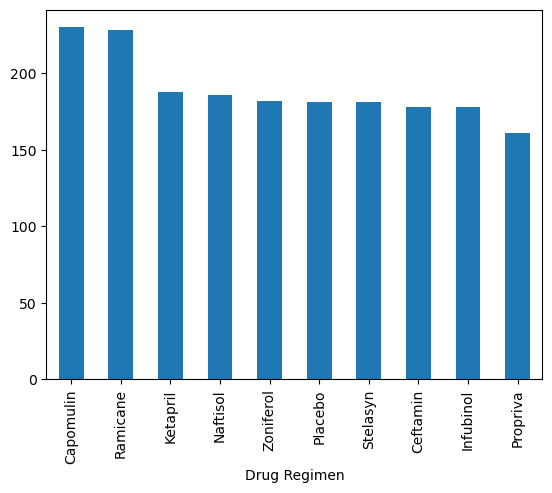

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
datastats = mouse_study_complete.groupby('Drug Regimen')['Timepoint'].count()
datastats.sort_values(ascending=False).plot.bar()
plt.show()

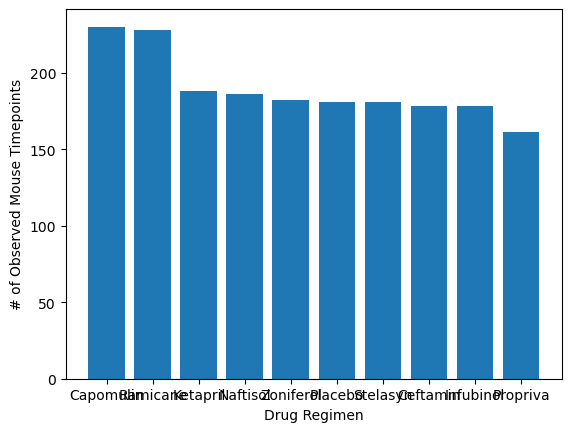

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
datastatspyplot = datastats.sort_values(ascending=False)
plt.bar(datastatspyplot.index, datastatspyplot.values)
plt.xlabel('Drug Regimen', size = 10)
plt.ylabel('# of Observed Mouse Timepoints', size = 10)
plt.show()

<Axes: ylabel='Sex'>

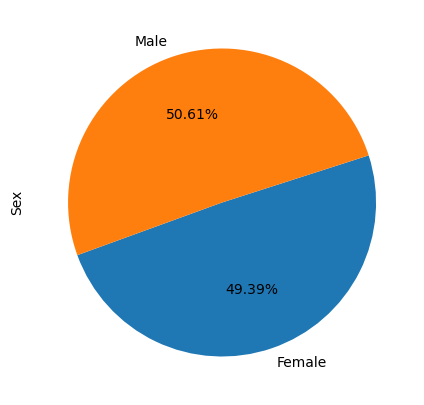

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderpieplot = mouse_study_complete.groupby(['Sex'])['Sex'].count()
genderpieplot.plot.pie(startangle=200, autopct= '%1.2f%%', figsize=(5, 5))

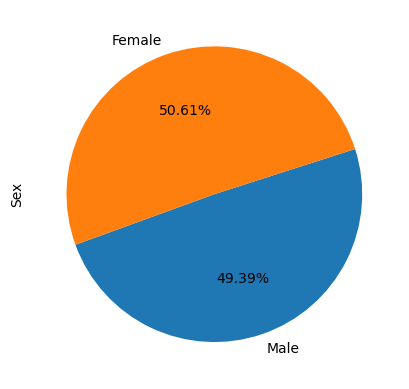

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderpieplot,  labels=('Male', 'Female'), startangle=200, autopct='%1.2f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouse_study_complete.groupby(['Mouse ID'])['Timepoint'].max()
lasttimepointdf = pd.DataFrame(lasttimepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastdf = pd.merge(mouse_study_complete, lasttimepointdf, on=('Mouse ID', 'Timepoint'), how='right')
lastdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []
 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lastdf.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
    
    # Create DataFrame
drugdf = pd.DataFrame({"Capomulin": tumor_capomulin, treatments[1]: tumor_ramicane, treatments[2]: tumor_infubinol, treatments[3]: tumor_ceftamin})

    
    # Determine min and max
drugdfmin = drugdf.min()
drugdfmax = drugdf.max()
drugdf

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


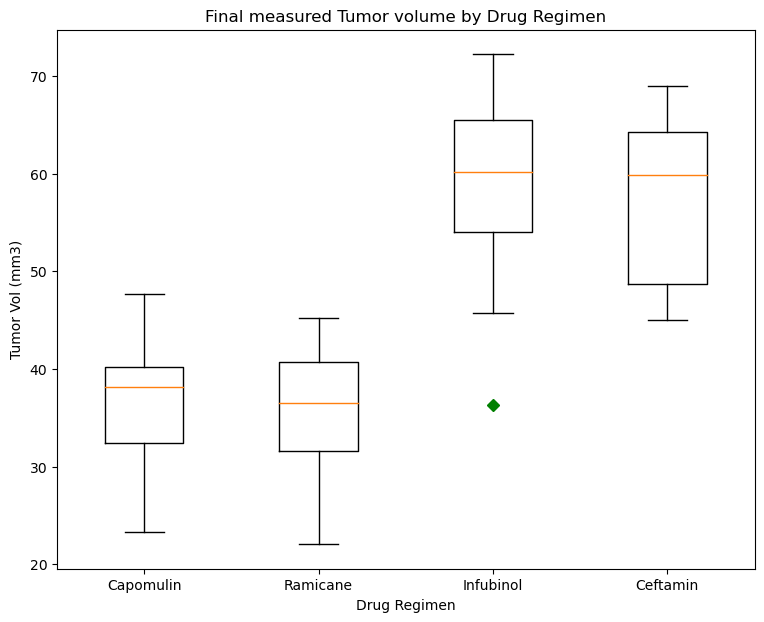

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drugdf['Capomulin'],
                drugdf[treatments[1]],
                drugdf[treatments[2]],
                drugdf[treatments[3]]
               ]
# Used plt.subplots to define size
figure1, tvdr = plt.subplots(figsize=(9,7))
# Create Title, and labels.
tvdr.set_title('Final measured Tumor volume by Drug Regimen') 
tvdr.set_xlabel('Drug Regimen') 
tvdr.set_ylabel('Tumor Vol (mm3)') 
tvdr.boxplot(boxplot_list, 0, 'gD')

plt.xticks([1,2,3,4], treatments) 
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
linedf = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "s185",:]
linedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Ramicane
# (Not required but I wanted to see if it works with other treatments)
secondmouselinedf = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "k403",:]
secondmouselinedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


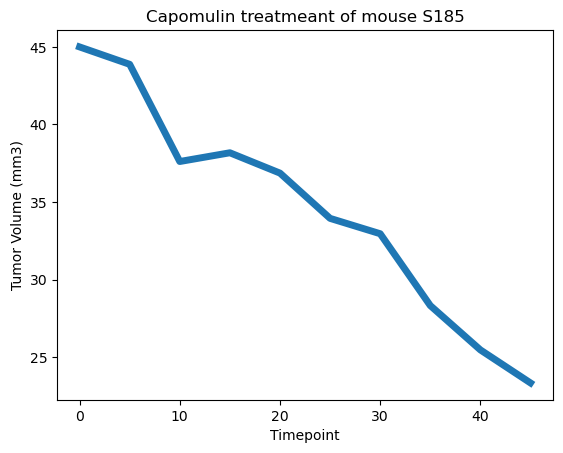

In [18]:

# Define x axis for the timepoint
xaxistimepoint = linedf["Timepoint"]

# Define y axis for the tumor size
yaxistumorsize = linedf["Tumor Volume (mm3)"]

# Plot line graph
plt.title('Capomulin treatmeant of mouse S185')
plt.plot(xaxistimepoint, yaxistumorsize,linewidth=5, markersize=10) 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

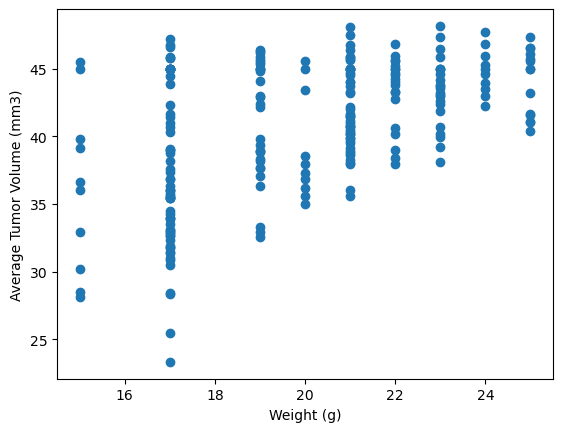

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulindf = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == "Capomulin",:]

# Plot scatter plot
plt.scatter(capomulindf['Weight (g)'], capomulindf['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corrrelation = round(st.pearsonr(mouse_study_complete['Weight (g)'], mouse_study_complete['Tumor Volume (mm3)'])[0],2)
corrrelation

0.59

In [21]:
# a linear regression results
linear_results = st.linregress(mouse_study_complete['Weight (g)'], mouse_study_complete['Tumor Volume (mm3)'])
linear_results

LinregressResult(slope=1.3325187223189503, intercept=16.252698110717233, rvalue=0.5874984592659988, pvalue=4.5020890358916254e-176, stderr=0.042207561995586694, intercept_stderr=1.0957166453669578)

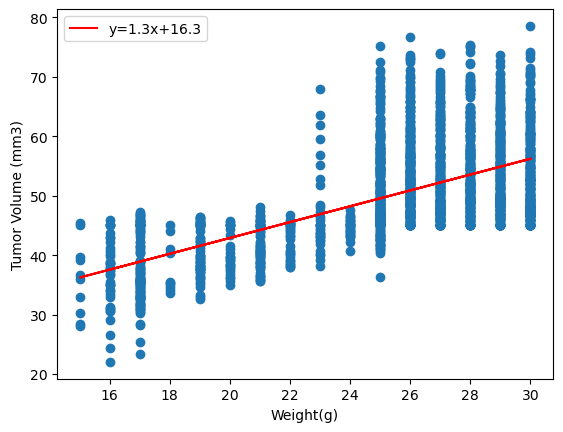

In [22]:
#  Plot linear regression model
slope = 1.3325187223189503
y_intercept = 16.252698110717233
linear_line = slope * (mouse_study_complete['Weight (g)']) + y_intercept

# Plot line visual
plt.scatter(mouse_study_complete['Weight (g)'],mouse_study_complete['Tumor Volume (mm3)'])
plt.plot(mouse_study_complete['Weight (g)'], linear_line, 'r', label='y={:.1f}x+{:.1f}'.format(slope, y_intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()